In [704]:
import cv2 as cv
import numpy as np
import random
from matplotlib import pyplot as plt

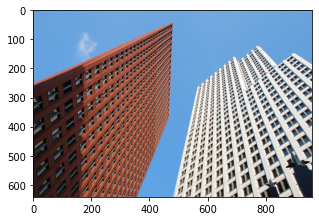

In [705]:
original_img = cv.imread('AP.jpg')
RGB_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = [5, 8]
plt.imshow(RGB_img)
plt.show()

In [706]:
# modified from https://gist.github.com/Prasad9/28f6a2df8e8d463c6ddd040f4f6a028a
def gauss_noise(img,mean = 0,var = 200):
    sigma = var ** 0.5
    gaussian1 = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
    gaussian2 = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
    gaussian3 = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
    noisy_image = np.zeros(img.shape, np.float32)
    if len(img.shape) == 2:
        noisy_image = img + gaussian1
    else:
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian1
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian2
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian3
    cv.normalize(noisy_image, noisy_image, 0, 255, cv.NORM_MINMAX, dtype=-1)
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

In [707]:
# modified from https://www.py4u.net/discuss/14307
def sp_noise(img,prob=0.05):
    output = np.zeros(img.shape,np.uint8)
    thres = 1 - prob
    ch =  3 if len(output.shape)!=2 else 1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = (0,0,0) if ch==3 else 0 #pepper
            elif rdn > thres:
                output[i][j] = (255,255,255) if ch==3 else 255 #salt
            else:
                output[i][j] = img[i][j]
    return output

## Generate Salt and Pepper Noise

In [708]:
sp_img = sp_noise(RGB_img,0.02)
gauss_img = gauss_noise(RGB_img)

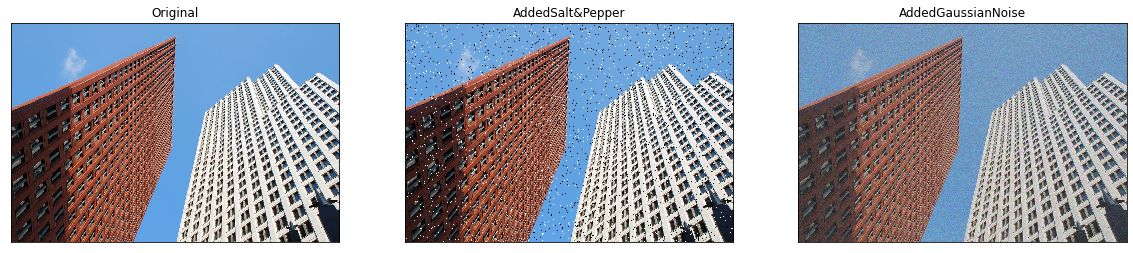

In [709]:
plt.rcParams["figure.figsize"] = [20, 20]
plt.subplot(131),plt.imshow(RGB_img,interpolation='none'),plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(sp_img,interpolation='none'),plt.title('AddedSalt&Pepper'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(gauss_img,interpolation='none'),plt.title('AddedGaussianNoise'),plt.xticks([]),plt.yticks([])
plt.show()

## จงแก้ Noise Salt & Peppper

In [710]:
# แก้เลยนะ อิอิ แก้ รูปในตัวแปรsp_imgให้เหมือนเดิมมากที่สุด

In [711]:
# รันผลลัพธ์ให้ดูด้วยนะ อิอิ เปรียบเทียบก่อนแก้ ในตัวแปร sp_img และหลังแก้ที่ตัวแปรที่เราเก็บภาพไว้เปรียบเทียบกัน

## จงแก้ Noise Gaussian

In [712]:
# แก้เลยนะ อิอิ แก้ รูปในตัวแปร gauss_imgให้เหมือนเดิมมากที่สุด

In [713]:
# รันผลลัพธ์ให้ดูด้วยนะ อิอิ เปรียบเทียบก่อนแก้ ในตัวแปร gauss_img และหลังแก้ที่ตัวแปรที่เราเก็บภาพไว้เปรียบเทียบกัน

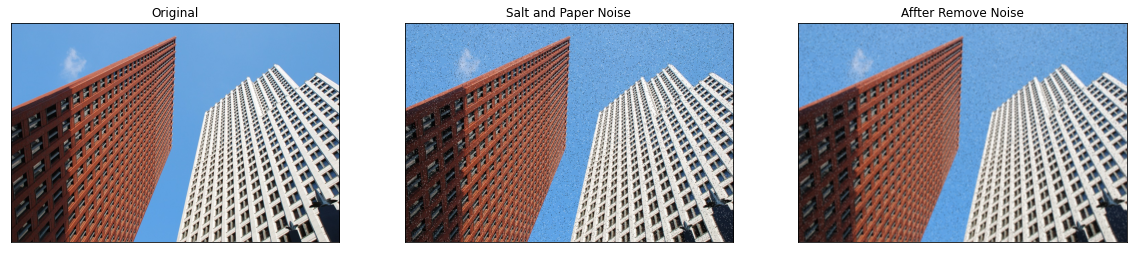

In [714]:
#แก้รูป Noise Salt and Paper
kernel_avg5x5 = np.ones((5,5),np.float32)/25 # Average Kernel 5x5

result_avg5x5_img = cv.filter2D(sp_img,-1,kernel_avg5x5)
plt.subplot(321),plt.imshow(RGB_img),plt.title('Original')
plt.rcParams["figure.figsize"] = [20, 20]
plt.subplot(331),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(sp_img),plt.title('Salt and Paper Noise')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(result_avg5x5_img),plt.title('Affter Remove Noise')
plt.xticks([]), plt.yticks([])

plt.show()

(([], []), ([], []))

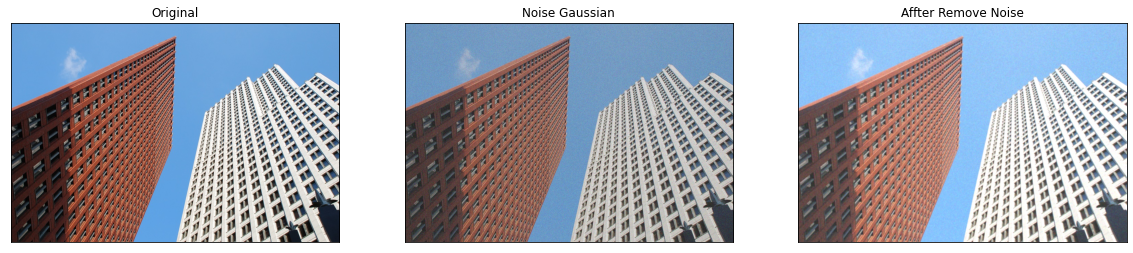

In [715]:
#แก้รูป Noise Gauss_img
kernel_avg5x5 = np.ones((5,5),np.float32)/17
kernel_avg3x3 = np.ones((3,3),np.float32)/7 # Average Kernel 5x5
kernel_avg7x7 = np.ones((7,7),np.float32)/40
kernel_avg9x9 = np.ones((9,9),np.float32)/80
result_avg5x5_img = cv.filter2D(gauss_img,-1,kernel_avg5x5)
res_img_3x3 = cv.filter2D(gauss_img,-1,kernel_avg3x3)
res_img_7x7 = cv.filter2D(gauss_img,-1,kernel_avg7x7)
res_img_9x9 = cv.filter2D(gauss_img,-1,kernel_avg9x9)
plt.rcParams["figure.figsize"] = [20, 20]
plt.subplot(331),plt.imshow(RGB_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(gauss_img),plt.title('Noise Gaussian')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(res_img_3x3),plt.title('Affter Remove Noise')
plt.xticks([]), plt.yticks([])
